In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
import scipy.optimize as op 
import seaborn as sns
from __future__ import division


In [103]:
#Import the data in csv file
#1---Heart condition
#0---healthy

df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [104]:
#Demarcate the features and the target variable
X = df.iloc[:,0:13] #collecting all required features 
y = df.iloc[:,13:14] #collecting the target variable

In [105]:
#Segregate the training and testing data, here the size of test samples is 20% of the total samples

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [106]:
#Creating numpy array for training data
X_train = np.vstack((np.asarray(X_train.age.values),\
               np.asarray(X_train.sex.values),\
               np.asarray(X_train.cp.values),\
               np.asarray(X_train.trestbps.values),\
               np.asarray(X_train.chol.values),\
               np.asarray(X_train.fbs.values),\
               np.asarray(X_train.restecg.values),\
               np.asarray(X_train.thalach.values),\
               np.asarray(X_train.exang.values),\
               np.asarray(X_train.oldpeak.values),\
               np.asarray(X_train.slope.values),\
               np.asarray(X_train.ca.values),\
               np.asarray(X_train.thal.values)))

y_train = np.asarray(y_train.target.values)

#Creating numpy array for testing data
X_test = np.vstack((np.asarray(X_test.age.values),\
               np.asarray(X_test.sex.values),\
               np.asarray(X_test.cp.values),\
               np.asarray(X_test.trestbps.values),\
               np.asarray(X_test.chol.values),\
               np.asarray(X_test.fbs.values),\
               np.asarray(X_test.restecg.values),\
               np.asarray(X_test.thalach.values),\
               np.asarray(X_test.exang.values),\
               np.asarray(X_test.oldpeak.values),\
               np.asarray(X_test.slope.values),\
               np.asarray(X_test.ca.values),\
               np.asarray(X_test.thal.values)))

y_test = np.asarray(y_test.target.values)

In [107]:
# The Logistic Function or the sigmoid function
#this will return binary vaues 0 or 1 based on the input z

def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

In [108]:
def FeatureScalingNormalizationMultipleVariables(X):
    # N.B.: this code is adapted for multiple variables
    
    # Initialize the following variables:
    # Make a copy of the X vector and call it X_norm
    X_norm = X 

    # mu: It will contain the average 
    # value of X in training set.
    mu = np.zeros(X.shape[1]) 
    

    # sigma: It will contain the Range(max-min)
    # of X or Standard Deviation
    sigma = np.zeros(X.shape[1]) 

    mu = np.vstack((X[0].mean(), \
                    X[1].mean(), \
                    X[2].mean(), \
                    X[3].mean(), \
                    X[4].mean(), \
                    X[5].mean(), \
                    X[6].mean(), \
                    X[7].mean(), \
                    X[8].mean(), \
                    X[9].mean(), \
                    X[10].mean(), \
                    X[11].mean(), \
                    X[12].mean()))
    # The Standard Deviation calculation with NumPy,
    # requires the argument "degrees of freedom" = 1
    sigma = np.vstack((X[0].std(ddof=1),\
                       X[1].std(ddof=1),\
                       X[2].std(ddof=1),\
                       X[3].std(ddof=1),\
                       X[4].std(ddof=1),\
                       X[5].std(ddof=1),\
                       X[6].std(ddof=1),\
                       X[7].std(ddof=1),\
                       X[8].std(ddof=1),\
                       X[9].std(ddof=1),\
                       X[10].std(ddof=1),\
                       X[11].std(ddof=1),\
                       X[12].std(ddof=1)))     

    # number of training examples
    m = X.shape[1] 
    
    # Make a vector of size m with the mu values
    mu_matrix = np.multiply(np.ones(m), mu).T 
    
    # Make a vector of size m with the sigma values    
    sigma_matrix = np.multiply(np.ones(m), sigma).T
    
    # Apply the Feature Scaling Normalization formula
    X_norm = np.subtract(X, mu).T
    X_norm = X_norm /sigma.T
    
    return [X_norm, mu, sigma]

In [109]:
#make confusion matrix

def confusion_mat(y_test,y_bin_pred):
    tp=0
    fp=0
    fn=0
    tn=0
    
    for i in range(len(y_test)):  
        if y_test[i]==y_bin_pred[i]: #Correct prediction
                  if y_test[i]==1: #y_test=y_pred=1 ****TP**** 
                    tp=tp+1   
                  else:      #y_test=y_pred=0 ****TN**** 
                    tn=tn+1
        else:#Incorrect prediction
            if y_test[i]==1:
                fn=fn+1
            else:
                fp=fp+1
    con_vector=[tp,fp,fn,tn]
    return con_vector


In [110]:
#---------------------For training data--------------------
# Normalize X using the FeatureScalingNormalizationMultipleVariables function, and 
# copy the results in the "featuresNormalizeresults" list
features_Normalizeresults_train = FeatureScalingNormalizationMultipleVariables(X_train)

# get the normalized X matrix
X_train = np.asarray(features_Normalizeresults_train[0]).T

# get the mean
mu_train = features_Normalizeresults_train[1]

# get the sigma
sigma_train = features_Normalizeresults_train[2]

# number of training examples
m_train = len(y_train) 

# number of features
n = len(X_train)

#---------------------For testing data--------------------
# Normalize X using the FeatureScalingNormalizationMultipleVariables function, and 
# copy the results in the "featuresNormalizeresults" list
features_Normalizeresults_test = FeatureScalingNormalizationMultipleVariables(X_test)

# get the normalized X matrix
X_test = np.asarray(features_Normalizeresults_test[0]).T

# get the mean
mu_test = features_Normalizeresults_test[1]

# get the sigma
sigma_test = features_Normalizeresults_test[2]

# number of testing examples
m_test = len(y_test) 




In [111]:
# Add a column of ones to the array/matrix X ad add a column of '1's
X_train = np.vstack((np.ones(m_train), X_train)).T

# Add a column of ones to the array/matrix X ad add a column of '1's
X_test = np.vstack((np.ones(m_test), X_test)).T



In [112]:
#Implement gradient decent with regualrization
def RegularizedgradientDescent(X_train, y_train, theta, alpha, lamda, num_iters):
    
    # number of training examples
    m = len(y) 
    w= 1+(alpha*lamda)
    
    # The following loop is to be repeated num_iters times to minimize theta, it is done to conclusively get smallest possible value of theta
    for i in range(num_iters):
        #With each itertion theta changes and hence h, error, J_diff and ofcourse theta changes.
        # Calculate h = X * theta (vectorized Eq. 5)
        pro=X_train@theta
        
        h =sigmoid(pro)
        #we make 1x m  matrix for the hypothesis for every theta.
        
        # Calculate the error = (h - y) (vectorized Eq. 5)
        error = h- y_train
        
        # Calculate the new theta (vectorized Eq. 5) 
        J_diff = (alpha * 1/m * np.sum(np.multiply(X_train.T, error), axis=1))
            
        
        # Update theta, here you get new value of theta
        theta = np.subtract((theta*w), J_diff)
        
        
    return theta

In [134]:
# Running the Gradient Descent
def metrics_cal(alpha,lamda):
    # Initialize theta
    theta = np.asarray(np.zeros(len(X_train[0]))).astype(float)
    
    # Run the gradientDescent() functi n, and collect the output in "results"
    theta = RegularizedgradientDescent(X_train, y_train, theta, alpha, lamda, num_iters)
    y_pred=sigmoid(X_test@theta)#gives the probability matrix of whether the Y_test is 1.
    y_bin_pred=(y_pred>0.5).astype('int') #0.5 is the threshold
    
    #callingc nfusion matrix values for accuracy value
    mat=confusion_mat(y_test,y_bin_pred)
        #mat=[tp,fp,fn,tn]
    tpr=mat[0]/(mat[0]+mat[2]) #calculating the corresponding tps and fps
    fpr=mat[1]/(mat[1]+mat[3])
    
    acc=mat[0]/(mat[0]+mat[1]+mat[2]+mat[3]) #calculating the corresponding accuracy
    
    metrics=[tpr,fpr,acc]
    return metrics

C:\Users\wasiq\AppData\Local\Temp/ipykernel_11984/4025264462.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


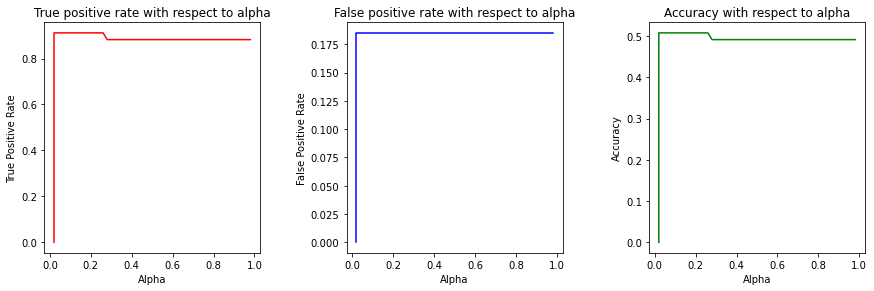

In [135]:
#Vary alpha( learning rate ) and see the corresponding change in accuracy,true positive rate, and False positive rate values.
i=1
tpr_store=[0]#initialization
fpr_store=[0]
acc_store=[0]
alpha=0.02*np.ones(50)
while i<50: #the loop will run from 0 to 4; making our 20 entries
    #<<<<<<<<<<<<<<0thentry--0 .....20th entry= 0.95>>>>>>>>>>>>>>>>
    alpha[i]=alpha[i]*i
    lamda1=0.5
    metrics=metrics_cal(alpha[i],lamda1) #metrics=[tpr,fpr,acc]
    tpr_store=np.vstack((tpr_store,metrics[0]))
    fpr_store=np.vstack((fpr_store,metrics[1]))
    acc_store=np.vstack((acc_store,metrics[2]))
    i=i+1

# print('alpha values are ',alpha)
# print('tpr store is ', tpr_store)
# print('fpr store is ', fpr_store)
# print('acc store is ', acc_store)
# plotting the points
# plt.plot(fpr_store, tpr_store, , label='ROC')
# plt.plot()
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 3)

# For True positive rate with respect to alpha..
axis[0].plot(alpha, tpr_store,color='r')
axis[0].set_title("True positive rate with respect to alpha")
axis[0].set_xlabel('Alpha')
axis[0].set_ylabel('True Positive Rate')


# For False positive rate with respect to alpha..
axis[1].plot(alpha, fpr_store,color='b')
axis[1].set_title("False positive rate with respect to alpha")
axis[1].set_xlabel('Alpha')
axis[1].set_ylabel('False Positive Rate')


# For ROC
axis[2].plot(alpha, acc_store,color='g')
axis[2].set_title("Accuracy with respect to alpha")
axis[2].set_xlabel('Alpha')
axis[2].set_ylabel('Accuracy')


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# function to show the plot
plt.show()


C:\Users\wasiq\AppData\Local\Temp/ipykernel_11984/4025264462.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


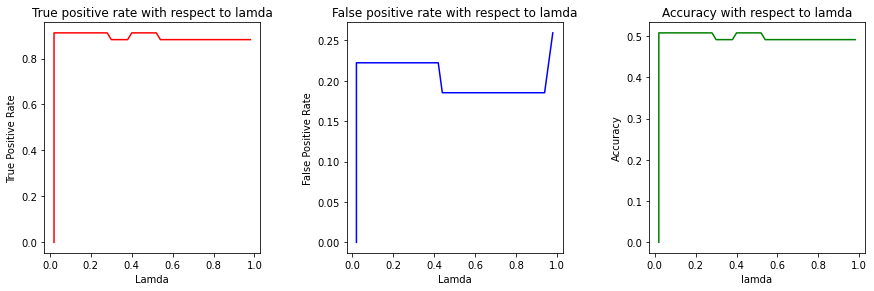

In [137]:
#Vary lambda and see the corresponding change in accuracy,true positive rate, and False positive rate values.
i=1
tpr_store=[0]#initialization
fpr_store=[0]
acc_store=[0]
lamda=0.02*np.ones(50)
while i<50: #the loop will run from 0 to 4; making our 20 entries
    #<<<<<<<<<<<<<<0thentry--0 .....20th entry= 0.95>>>>>>>>>>>>>>>>
    lamda[i]=lamda[i]*i
    alpha1=0.1
    metrics=metrics_cal(alpha1,lamda[i]) #metrics=[tpr,fpr,acc]
    tpr_store=np.vstack((tpr_store,metrics[0]))
    fpr_store=np.vstack((fpr_store,metrics[1]))
    acc_store=np.vstack((acc_store,metrics[2]))
    i=i+1

# print('lamda values are ',lamda)
# print('tpr store is ', tpr_store)
# print('fpr store is ', fpr_store)
# print('acc store is ', acc_store)


# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 3)

# For True positive rate with respect to alpha..
axis[0].plot(lamda, tpr_store,color='r')
axis[0].set_title("True positive rate with respect to lamda")
axis[0].set_xlabel('Lamda')
axis[0].set_ylabel('True Positive Rate')


# For False positive rate with respect to alpha..
axis[1].plot(lamda, fpr_store,color='b')
axis[1].set_title("False positive rate with respect to lamda")
axis[1].set_xlabel('Lamda')
axis[1].set_ylabel('False Positive Rate')


# For ROC
axis[2].plot(alpha, acc_store,color='g')
axis[2].set_title("Accuracy with respect to lamda")
axis[2].set_xlabel('lamda')
axis[2].set_ylabel('Accuracy')


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# function to show the plot
plt.show()
